In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from colour import Color

%matplotlib inline

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<IPython.core.display.Javascript object>

We get the indices of the `Attrition`, `DistanceFromHome` and `JobRole` columns from the `info` method, in addition to viewing their data types. `DistanceFromHome` has to be an integer or float.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<IPython.core.display.Javascript object>

Check for `NaN` values in the dataset

In [6]:
nan_vals = df[df.isna().any(axis=1)]
nan_vals

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


<IPython.core.display.Javascript object>

No `NaN` values detected present in the dataset, however proceed with cleaning the dataset for good practice

In [7]:
df = df.dropna(how="all")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<IPython.core.display.Javascript object>

Isolate the columns of interest into their own DataFrame

In [8]:
breakdown = df.iloc[
    :,
    [
        1,
        5,
        15,
    ],
]
breakdown

,Attrition,DistanceFromHome,JobRole
0,Yes,1,Sales Executive
1,No,8,Research Scientist
2,Yes,2,Laboratory Technician
3,No,3,Research Scientist
4,No,2,Laboratory Technician
...,...,...,...
1465,No,23,Laboratory Technician
1466,No,6,Healthcare Representative
1467,No,4,Manufacturing Director
1468,No,2,Sales Executive


<IPython.core.display.Javascript object>

An overview of the `Attrition` and `JobRole` using and bar plots

In [9]:
attrition_count = breakdown.Attrition.value_counts()
job_role_count = breakdown.JobRole.value_counts()

<IPython.core.display.Javascript object>

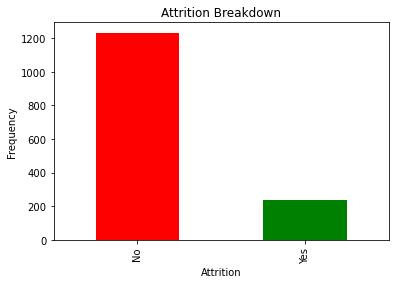

<IPython.core.display.Javascript object>

In [10]:
att_plot = attrition_count.plot(
    kind='bar', 
    title="Attrition Breakdown",
    xlabel="Attrition",
    ylabel="Frequency",
    color=['red', 'green'],
)


In [11]:
# def set_color_grad(color_a, color_b):
#     return list(Color(color_a).range_to(Color(color_b), 10))

<IPython.core.display.Javascript object>

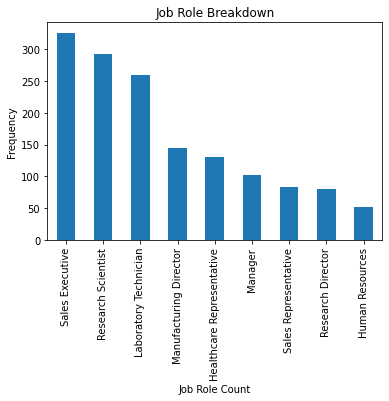

<IPython.core.display.Javascript object>

In [12]:
jb_plot = job_role_count.plot(
    kind="bar",
    title="Job Role Breakdown",
    xlabel="Job Role Count",
    ylabel="Frequency",
)

Sales Executives make up most of the work force, followed by research scientist compared to human resources who make up the least of the workforce

Using `pandas.crosstab` method, we can compare the distance from home to the amount of attrition.

<AxesSubplot:title={'center':'Distribution of attrition by distance from home'}, xlabel='DistanceFromHome', ylabel='Attrition Frequency'>

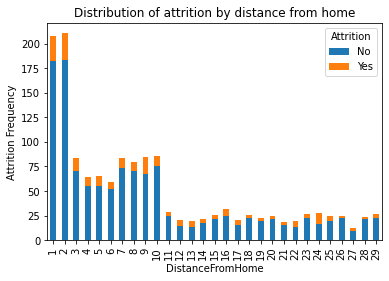

<IPython.core.display.Javascript object>

In [13]:
pd.crosstab(breakdown.DistanceFromHome, breakdown.Attrition).plot(
    kind="bar",
    stacked=True,
    ylabel="Attrition Frequency",
    title="Distribution of attrition by distance from home",
)

A higher attrition frequency would be expected the greater the distance from home, however from the plot above, higher attrition frequency occurs the closer a worker is to the work place.

We can now compare the distance from home and job role.

<AxesSubplot:title={'center':'Distance from home by job role'}, xlabel='DistanceFromHome', ylabel='Frequency'>

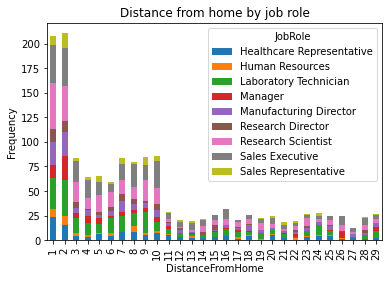

<IPython.core.display.Javascript object>

In [14]:
pd.crosstab(breakdown.DistanceFromHome, breakdown.JobRole).plot(
    kind="bar", stacked=True, title="Distance from home by job role", ylabel="Frequency"
)

As expected, workers would prefer to live close to the place they work no matter their job role. Despite making up most of the workforce, sales executives appear to be evenly distributed within 10Km of their workplace, with fewer of them beyond that distance compared to research scientists who, though they prefer live close to their work place, make up a significant number of those living beyond 10Km. 

## Question 2

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<IPython.core.display.Javascript object>

Isolating the 3 columns of interest

In [16]:
breakdown_2 = df.iloc[:, [1, 6, 18]]
breakdown_2.head()

,Attrition,Education,MonthlyIncome
0,Yes,2,5993
1,No,1,5130
2,Yes,2,2090
3,No,4,2909
4,No,1,3468


<IPython.core.display.Javascript object>

We can compare monthly income to atrrition and education levels using histograms

In [17]:
breakdown_2.MonthlyIncome.max()

19999

<IPython.core.display.Javascript object>

In [18]:
bins = np.arange(0, 20001, 2500)
bins

array([    0,  2500,  5000,  7500, 10000, 12500, 15000, 17500, 20000])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Education'>

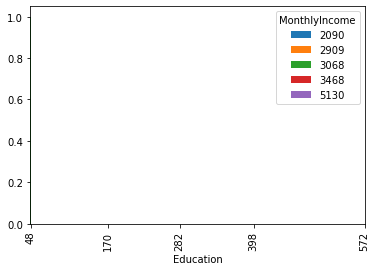

<IPython.core.display.Javascript object>

In [32]:
# pd.crosstab(breakdown_2.Attrition, breakdown_2.Education).plot(kind="bar", stacked=True)
education = breakdown_2.Education.dropna()
education.value_counts()

pd.crosstab(education.value_counts(), breakdown_2.MonthlyIncome).plot(
    kind="bar", stacked=True
)

# plt.hist(education, bins, histtype="bar", rwidth=0.8)

# plt.xlabel("Education")
# plt.ylabel("Monthly Income")
# plt.title("Comparinng monthly income to education level")
# plt.show()